# A Study of Careers in Astronomy Using ADS

Getting all data, names and gender assignment:

In [1]:
#import ads

### Download all dissertation data from ADS from 1990 to 2013
### This saves the JSON files to ../data/ads_{year}_NNN.dat

#ads.get_data.get_data()

### pull all unique institution names to ../data/unique_institutions.dat
 
#ads.get_data.unique_institutions()


### parse US institutions out by hand to ../data/unique_institutions_us.dat
### get_data.read_usa_institutions() returns that list

### There is a number of dissertations with missing affiliations. The API doesn't have the info, but if I grab the HTML
### page directly, usually there is an entry there. This returns a bibitem and institution for most of those to a list:
### ../data/missing_affil.dat

#ads.get_data.check_missing_affils()

### pull the US institutions by hand to '../data/unique_missing_usa.dat'
### But I think I'm mostly going to leave these as "no data" and just report them in a table?

#years = np.arange(1970, 2010, 1)
#for year in years:
#	get_data.parse_output(year=year, verbose=False)

### to get the total number of PhDs:
### wc -l ../data/*parse*
### 1996 is an outlier, there's something sketchy in the database for that year





Get data for physics PhDs in 2000 for comparison.

### Plots

Comparison between ADS and NSF numbers.

In [41]:
import matplotlib.pyplot as plt
import astropy
from astropy.io import ascii
import numpy as np
import glob
import matplotlib.colors as colors
import matplotlib.cm as cmx

%matplotlib inline

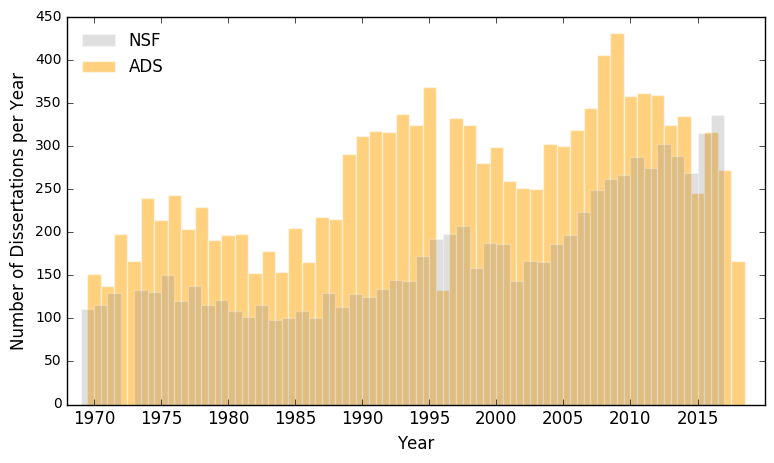

In [143]:
phds = ascii.read('../../number_of_phds.dat', format='commented_header')

aip_years = [2003,2004,2005,2006, 2007, 2008, 2009, 2010, 2011, 2012]
aip_num = [88, 116, 91, 119, 125, 161, 141, 156, 160, 162]

width=1.0
fig, ax = plt.subplots(figsize=(9,5))

ads_phds = ax.bar(phds['year'], phds['ads'], width, color='orange', alpha=0.5, edgecolor='white', align='center')
nsf_phds = ax.bar(phds['year']-0.5, phds['nsf'], width, color='0.5', alpha=0.25, edgecolor='white', align='center')
#aip_phds = ax.bar(aip_years, aip_num, width, color='0.7', alpha=0.8, edgecolor='white', align='center')

ax.set_ylabel('Number of Dissertations per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1968, 2020])
ax.set_ylim([0, 450])

ax.legend((nsf_phds[0], ads_phds[0]), ('NSF', 'ADS'), loc='upper left', frameon=False)

plt.show(block=False)

fig.savefig('number_phds.png', dpi=300)


In [7]:
# This is how to find the genders of all PhD recipients.
# Most of this code is in gender.py

#get_data.parse_output produces "ads_first_names.dat" file containing all first names

#gender.parse_names()
#There are 9607 names and 2922 unique names.
#There are 508 entries with only a first initial.
#Output file is ads_unique_names.dat
# Manually removed the following:
#(Karl)
#-J.
#-Wen
#-Ting
#-Jen
# and removed 22 '.' at the end of names

# For 2011-2018:
# There are 2364 names and 1114 unique names.
# There are 18 entries with only a first initial.
#gender.querry_apis()

# make table
#gender.gender_breakdown()
# Output file is ../data/gender_breakdown.dat

Plot of the gender distribution as a function of time:

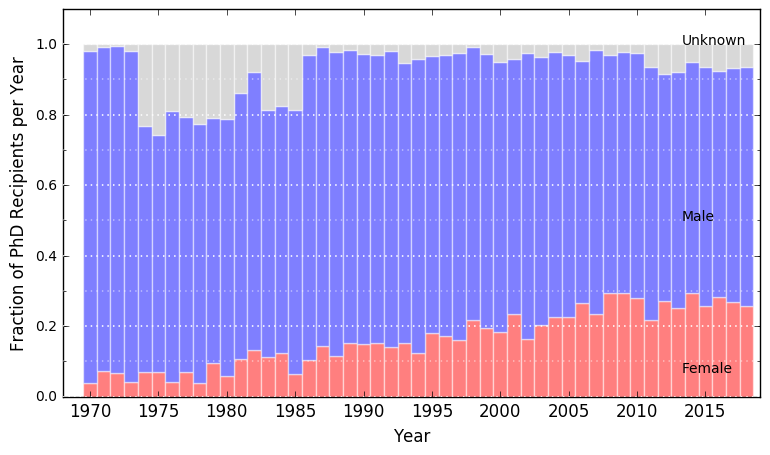

In [10]:
"""
Plot a histogram with 100% bars, colored by the fraction of PhDs of each gender.
"""

phds = astropy.io.ascii.read('../data/gender_breakdown.dat', )
all = np.array(phds['all'], dtype=float)

width=1.
fig, ax = plt.subplots(figsize=(9,5))

women = ax.bar(phds['year'], phds['women']/all, width, color='red',  alpha=0.5, edgecolor='white',align='center')	
men = ax.bar(phds['year'], phds['men']/all, width, color='b', alpha=0.5, edgecolor='white', bottom=(phds['women']/all),align='center')	
nodata = ax.bar(phds['year'], phds['nodata']/all, width, color='0.7', bottom=((phds['men']+phds['women'])/all), alpha=0.5, edgecolor='white',align='center')	

#print(phds['women']/all)

ax.set_ylabel('Fraction of PhD Recipients per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1968, 2019])
ax.set_ylim([0, 1.1])

major_yticks = np.arange(0, 1.1, 0.2)                                              
minor_yticks = np.arange(0, 1.1, 0.1)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

ax.text(2013.25, 1.0, 'Unknown')
ax.text(2013.25, 0.5, 'Male')
ax.text(2013.25, 0.07, 'Female')
#ax.yaxis.grid(True, color='1.0', linestyle=':', lw=1.1)
ax.yaxis.grid(which='minor', alpha=0.5, color='1.0', linestyle=':', lw=1.1)                                                
ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                

fig.savefig('number_phds_gender.png', dpi=300)


Overall fraction of women: 0.19226279806569951


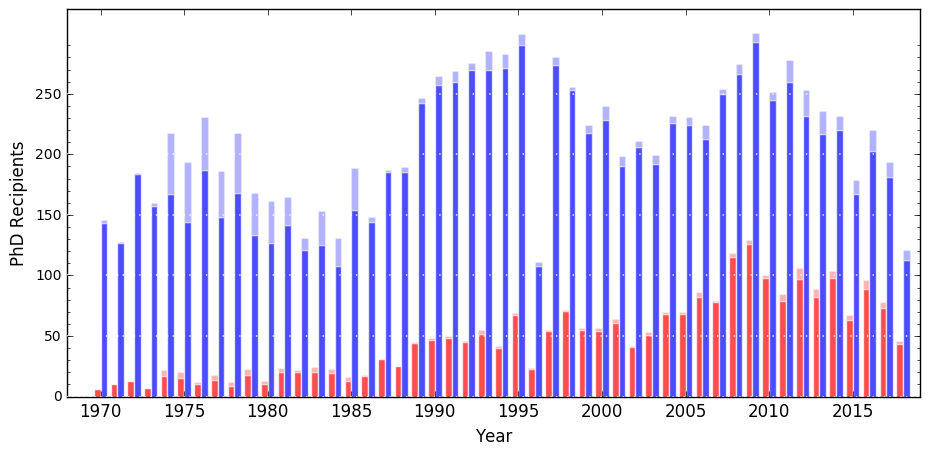

In [66]:
"""
Plot a histogram with red and blue bars next to each other,
showing the number of PhDs from each gender
"""

phds = astropy.io.ascii.read('../data/gender_breakdown.dat', )
all = np.array(phds['all'], dtype=float)

width=0.4
fig, ax = plt.subplots(figsize=(11,5))

f_frac = phds['women']/(phds['women']+phds['men'])
print('Overall fraction of women: {}'.format(np.sum(phds['women'])/(np.sum(phds['women'])+np.sum(phds['men']))))

women = ax.bar(phds['year'], phds['women'], width*-1, color='red',  alpha=0.7, edgecolor='white',align='edge')	
women_plus = ax.bar(phds['year'], phds['nodata']*f_frac, width*-1, color='red', alpha=0.3, edgecolor='white',align='edge', bottom=phds['women'])

men = ax.bar(phds['year'], phds['men'], width, color='b', alpha=0.7, edgecolor='white', align='edge')	
men = ax.bar(phds['year'], phds['nodata']*(1-f_frac), width, color='b', alpha=0.3, edgecolor='white', align='edge', bottom=phds['men'])	
#nodata = ax.bar(phds['year'], phds['nodata'], width*-1, color='0.5', alpha=0.5, edgecolor='white',align='edge')	

ax.set_ylabel('PhD Recipients', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1968, 2019])
ax.set_ylim([0, 320])

major_yticks = np.arange(0, 300, 50)                                              
minor_yticks = np.arange(0, 300, 10)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

#ax.text(2005.25, 0.95, 'Unknown')
#ax.text(2005.25, 0.5, 'Men')
#ax.text(2005.25, 0.07, 'Women')
#ax.yaxis.grid(True, color='1.0', linestyle=':', lw=1.1)
#ax.yaxis.grid(which='minor', alpha=0.5, color='1.0', linestyle=':', lw=1.1)                                                
ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                

#fig.savefig('../plots/number_phds_gender.png', dpi=300)


In [7]:
### Publication records
# for year in np.arange(1970, 2011,1):
#    publications.lookup_pubs(phd_year=year)
# Massa, Jose Luiz Lunas De Mello

Plotting the publication records of all PhD recipients from a given cohort.

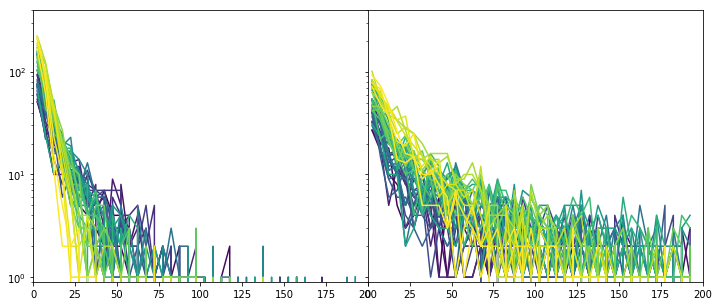

In [131]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import glob

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2007_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

fig = plt.figure(1,figsize=(12, 5))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0.9,400])
ax2.set_ylim([0.9,400])
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.set_xlim([0,200])
ax2.set_xlim([0,200])
ax2.set_yticklabels([])

values = np.arange(0,45,1)

vir = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)

bins = np.arange(0,200,5)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_n_pubs_pre_phd']+data['fa_n_pubs_prost_phd'], bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_n_pubs_pre_phd']+data['all_n_pubs_prost_phd'], bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n, color=colorVal)
    ax2.plot(all_center, all_n, color=colorVal)


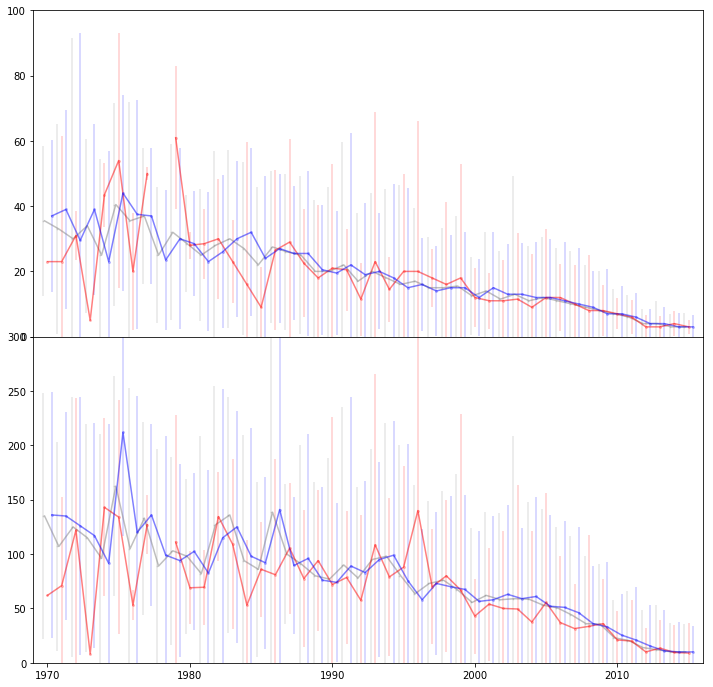

In [160]:
### Plot of publication stats

fig = plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([0,100])
ax2.set_ylim([0,300])
ax1.set_xlim([0,47])
ax2.set_xlim([0,47])
ax1.set_xticklabels([])

labels = ['1970', '1980', '1990', '2000','2010']
ax2.set_xticks(np.array([1,11,21,31,41]))
ax2.set_xticklabels(labels)

data_fa=ascii.read('../data/publication_statistics_fa.dat')
data_all=ascii.read('../data/publication_statistics_all.dat')

ax1.errorbar(data_fa['year']-1969.3, data_fa['median'], yerr=data_fa['std'], ecolor='0.5', fmt='o', alpha=0.2, color='0.5', markersize=1.)
ax1.errorbar(data_fa['year']-1969., data_fa['f_median'], yerr=data_fa['f_std'], ecolor='r', fmt='o', alpha=0.2, color='r', markersize=2.)
ax1.errorbar(data_fa['year']-1968.7, data_fa['m_median'], yerr=data_fa['m_std'], ecolor='b', fmt='o', alpha=0.2, color='b', markersize=2.)
ax1.plot(data_fa['year']-1969.2, data_fa['median'],'-',color='0.5', alpha=0.5)
ax1.plot(data_fa['year']-1969., data_fa['f_median'],'-',color='r', alpha=0.5)
ax1.plot(data_fa['year']-1968.7, data_fa['m_median'],'-',color='b', alpha=0.5)

ax2.errorbar(data_all['year']-1969.3, data_all['median'], yerr=data_all['std'], ecolor='0.5', fmt='o',alpha=0.2, color='0.5', markersize=1.)
ax2.errorbar(data_all['year']-1969., data_all['f_median'], yerr=data_all['f_std'], ecolor='r', fmt='o', alpha=0.2, color='r', markersize=2.)
ax2.errorbar(data_all['year']-1968.7, data_all['m_median'], yerr=data_all['m_std'], ecolor='b', fmt='o', alpha=0.2, color='b', markersize=2.)
ax2.plot(data_all['year']-1969.2, data_all['median'],'-',color='0.5', alpha=0.5)
ax2.plot(data_all['year']-1969., data_all['f_median'],'-',color='r', alpha=0.5)
ax2.plot(data_all['year']-1968.7, data_all['m_median'],'-',color='b', alpha=0.5)


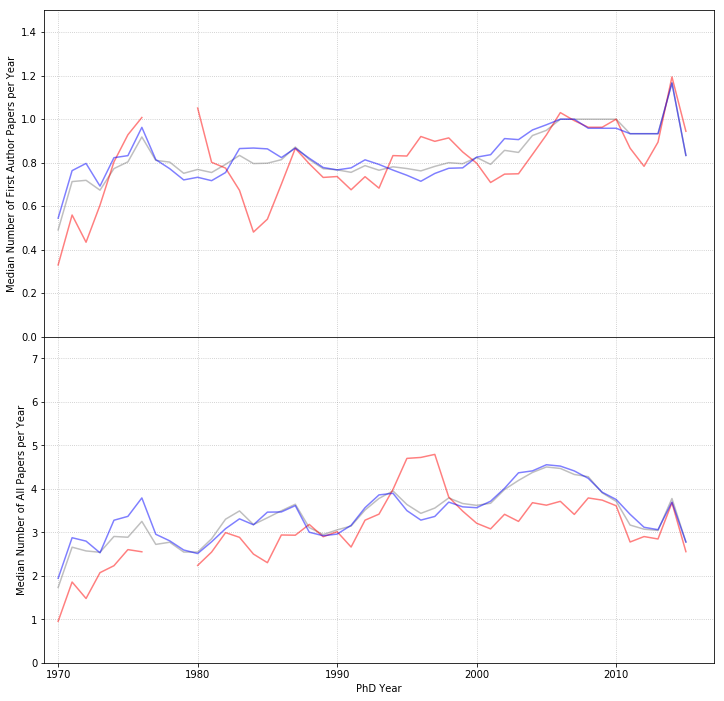

In [206]:
### Publication rate

fig = plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([0,1.5])
ax2.set_ylim([0,7.5])
ax1.set_xlim([-1,47])
ax2.set_xlim([-1,47])
ax1.set_xticklabels([])
ax1.grid(alpha=0.5, color='0.5',linestyle=':')
ax2.grid(alpha=0.5, color='0.5',linestyle=':')
ax1.set_ylabel('Median Number of First Author Papers per Year')
ax2.set_ylabel('Median Number of All Papers per Year')
ax2.set_xlabel('PhD Year')


labels = ['1970', '1980', '1990', '2000','2010']
ax2.set_xticks(np.array([0,10,20,30,40]))
ax2.set_xticklabels(labels)

data_fa=ascii.read('../data/publication_statistics_fa.dat')
data_all=ascii.read('../data/publication_statistics_all.dat')

#ax1.plot(data_fa['year']-1970, data_fa['median']/(2017-data_fa['year']),'-',color='0.5', alpha=0.5)
#ax1.plot(data_fa['year']-1970, data_fa['f_median']/(2017-data_fa['year']),'-',color='r', alpha=0.5)
#ax1.plot(data_fa['year']-1970, data_fa['m_median']/(2017-data_fa['year']),'-',color='b', alpha=0.5)

box = np.ones(3)/3
ax1.plot(data_fa['year']-1970, np.convolve(data_fa['median']/(2017-data_fa['year']), box,  mode='same'),'-',color='0.5', alpha=0.5)
ax1.plot(data_fa['year']-1970, np.convolve(data_fa['f_median']/(2017-data_fa['year']), box, mode='same'),'-',color='r', alpha=0.5)
ax1.plot(data_fa['year']-1970, np.convolve(data_fa['m_median']/(2017-data_fa['year']), box, mode='same'),'-',color='b', alpha=0.5)

ax2.plot(data_all['year']-1970, np.convolve(data_all['median']/(2017-data_all['year']), box,  mode='same'),'-',color='0.5', alpha=0.5)
ax2.plot(data_all['year']-1970, np.convolve(data_all['f_median']/(2017-data_all['year']), box,  mode='same'),'-',color='r', alpha=0.5)
ax2.plot(data_all['year']-1970, np.convolve(data_all['m_median']/(2017-data_all['year']), box,  mode='same'),'-',color='b', alpha=0.5)



[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009
 2010 2011 2012 2013 2014 2015 2016]
(['fa_1995', 'fa_1996', 'fa_1997', 'fa_1998', 'fa_1999', 'fa_2000', 'fa_2001', 'fa_2002', 'fa_2003', 'fa_2004', 'fa_2005', 'fa_2006', 'fa_2007', 'fa_2008', 'fa_2009', 'fa_2010', 'fa_2011', 'fa_2012', 'fa_2013', 'fa_2014', 'fa_2015', 'fa_2016'], ['all_1995', 'all_1996', 'all_1997', 'all_1998', 'all_1999', 'all_2000', 'all_2001', 'all_2002', 'all_2003', 'all_2004', 'all_2005', 'all_2006', 'all_2007', 'all_2008', 'all_2009', 'all_2010', 'all_2011', 'all_2012', 'all_2013', 'all_2014', 'all_2015', 'all_2016'])


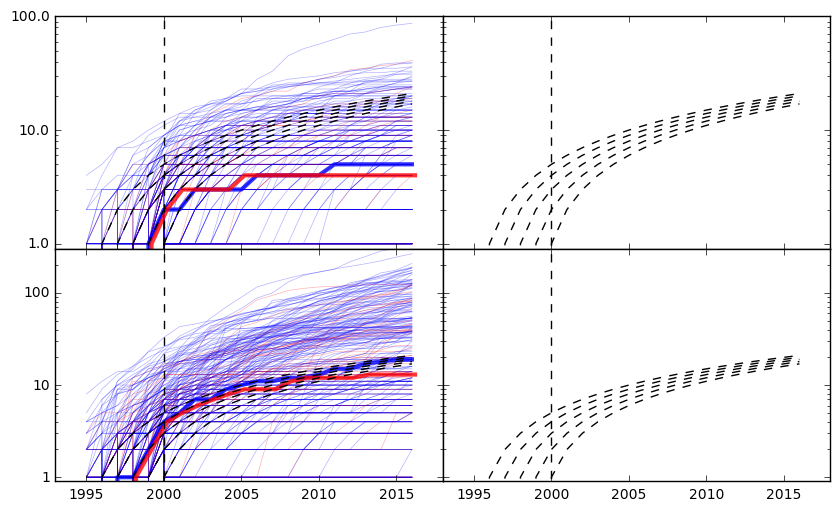

In [8]:
from astropy.table import Table
from matplotlib.ticker import ScalarFormatter

phd_year = 2000


file = '../data/ads_{}_pub_stats.dat'.format(phd_year)
data = ascii.read(file)
years = np.arange(phd_year-5, 2017,1)
print(years)
fa_colnames = data.colnames[-2*len(years)-1:len(years)*-1-1]
all_colnames = data.colnames[len(years)*-1-1:-1]
print(fa_colnames, all_colnames)

fa_table = Table(data.columns[-2*len(years)-1:len(years)*-1-1])
all_table = Table(data.columns[len(years)*-1-1:-1])

### another way to do these plots 
#foo = np.array([fa_table[nm] for nm in fa_table.colnames])
#foo.T.shape

fig = plt.figure(1,figsize=(10, 6))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)
ax4 = plt.subplot(2, 2, 4)

fa_cumsum_male = np.zeros((np.sum(data['gender'] == 'male')+1, len(years)))
fa_cumsum_female = np.zeros((np.sum(data['gender'] == 'female')+1, len(years)))
all_cumsum_male = np.zeros((np.sum(data['gender'] == 'male')+1, len(years)))
all_cumsum_female = np.zeros((np.sum(data['gender'] == 'female')+1, len(years)))

jj = 0
kk = 0
for i in range(len(data)):
    fa_data = np.array([a for a in fa_table[i]])
    all_data = np.array([a for a in all_table[i]])

    if data[i]['gender'] == 'male':
        ax1.plot(years, np.cumsum(fa_data), color='blue', alpha=0.3, lw=0.5)
        ax3.plot(years, np.cumsum(all_data), color='blue', alpha=0.3, lw=0.5)
        #ax1.plot(years, np.cumsum(np.array(fa_table[i]).astype('i8')), color='blue', alpha=0.3, lw=0.5)
        #ax3.plot(years, np.cumsum(np.array(all_table[i]).astype('i8')), color='blue', alpha=0.3, lw=0.5)
        fa_cumsum_male[jj] = np.cumsum(fa_data)
        all_cumsum_male[jj] = np.cumsum(all_data)
        jj += 1
    elif data[i]['gender'] == 'female':
        ax1.plot(years, np.cumsum(fa_data), color='red', alpha=0.3, lw=0.5)
        ax3.plot(years, np.cumsum(all_data), color='red', alpha=0.3, lw=0.5)
        fa_cumsum_female[kk] = np.cumsum(fa_data)
        all_cumsum_female[kk] = np.cumsum(all_data)
        kk += 1
        
ax1.plot(years, np.median(fa_cumsum_male, axis=0), color='blue', alpha=0.8, lw=3, linestyle='-')
ax1.plot(years+0.2, np.median(fa_cumsum_female, axis=0), color='red', alpha=0.8, lw=3, linestyle='-')
ax3.plot(years, np.median(all_cumsum_male, axis=0), color='blue', alpha=0.8, lw=3, linestyle='-')
ax3.plot(years+0.2, np.median(all_cumsum_female, axis=0), color='red', alpha=0.8, lw=3, linestyle='-')

for ax in (ax1, ax2, ax3, ax4):
    ax.plot([phd_year, phd_year],[0,1000], color='black', linestyle='--', lw=1)
    ax.plot(years, np.arange(0,len(years),1), color='black', linestyle='--', lw=1)
    ax.plot(years[1:], np.arange(0,len(years[1:]),1), color='black', linestyle='--', lw=1)
    ax.plot(years[2:], np.arange(0,len(years[2:]),1), color='black', linestyle='--', lw=1)
    ax.plot(years[3:], np.arange(0,len(years[3:]),1), color='black', linestyle='--', lw=1)
    ax.plot(years[4:], np.arange(0,len(years[4:]),1), color='black', linestyle='--', lw=1)
    ax.set_xlim([phd_year-7, 2018])
    ax.set_yscale("log")
for ax in (ax1, ax2):
    ax.set_ylim([0.9, 100])
    ax.set_xticklabels([])
for ax in (ax3, ax4):
    ax.set_ylim([0.9, 300])
for ax in (ax2, ax4):
    ax.set_yticklabels([])
for ax in (ax1, ax3):
    ax.yaxis.set_major_formatter(ScalarFormatter())


Plot distributions of the last published paper: first author and any author. How many years post-PhD did they stop publishing papers?

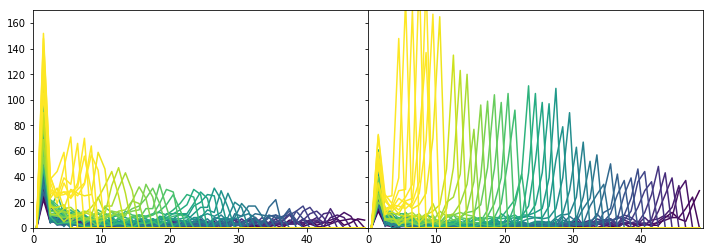

In [183]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import glob

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2007_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

fig = plt.figure(1,figsize=(12, 4))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,170])
ax2.set_ylim([0,170])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

values = np.arange(0,40,1)

vir = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-year+1, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-year+1, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n, color=colorVal)
    ax2.plot(all_center, all_n, color=colorVal)


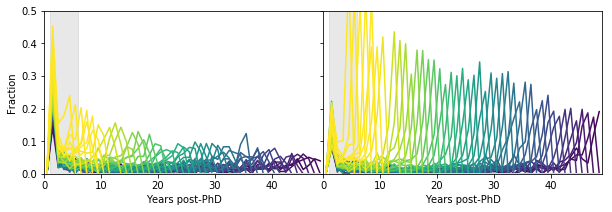

In [184]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import glob

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2007_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0.0,0.5])
ax2.set_ylim([0.0,0.5])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Years post-PhD')
ax2.set_xlabel('Years post-PhD')


ax1.fill_between([1,6],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)
ax2.fill_between([1,6],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)

values = np.arange(0,40,1)

vir = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=vir)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-year+1, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-year+1, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n/np.sum(fa_n), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(all_n), color=colorVal)


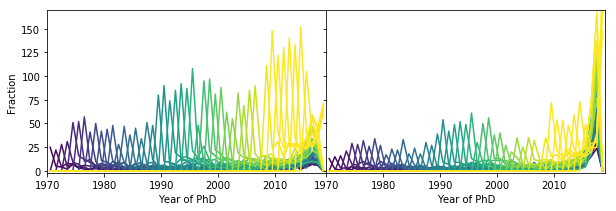

In [186]:
files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2007_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([-2,170])
ax2.set_ylim([-2,170])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

labels = ['1970', '1980', '1990', '2000','2010']
ax1.set_xticks(np.array([0,10,20,30,40]))
ax1.set_xticklabels(labels)
ax2.set_xticks(np.array([0,10,20,30,40]))
ax2.set_xticklabels(labels)

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Year of PhD')
ax2.set_xlabel('Year of PhD')

values = np.arange(0,40,1)

jet = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-1970, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-1970, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n, color=colorVal)
    ax2.plot(all_center, all_n, color=colorVal)


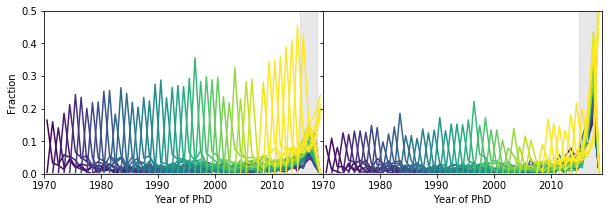

In [188]:
files = glob.glob('../data/ads_*_pub_stats.dat')
#files.remove('../data/ads_1992_pub_stats.dat')
files.remove('../data/ads_2007_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,0.5])
ax2.set_ylim([0,0.5])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

labels = ['1970', '1980', '1990', '2000','2010']
ax1.set_xticks(np.array([0,10,20,30,40]))
ax1.set_xticklabels(labels)
ax2.set_xticks(np.array([0,10,20,30,40]))
ax2.set_xticklabels(labels)

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Year of PhD')
ax2.set_xlabel('Year of PhD')

ax1.fill_between([45,48],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)
ax2.fill_between([45,48],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)


values = np.arange(0,40,1)

jet = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-1970, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-1970, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n/np.sum(fa_n), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(all_n), color=colorVal)


Break down by gender, fraction of people who drop out withing 5 years of receiving PhD.

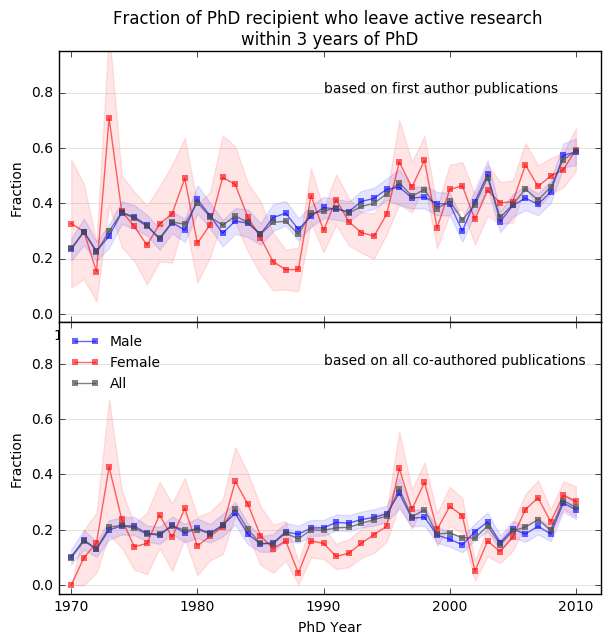

In [140]:
phds = astropy.io.ascii.read('../data/gender_breakdown.dat')[:-8]
f_frac = (phds['women']/(phds['women']+phds['men']))

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2011_pub_stats.dat')
files.remove('../data/ads_2012_pub_stats.dat')
files.remove('../data/ads_2013_pub_stats.dat')
files.remove('../data/ads_2014_pub_stats.dat')
files.remove('../data/ads_2015_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

women_leave_fa = []
women_all = []
women_leave_all = []

men_leave_fa = []
men_leave_all = []
men_all = []

nn_leave_fa = []
nn_leave_all = []
nn_all = []

all_leave_fa = []
all_leave_all = []

#years = np.arange(1970,2016,1)
years =[]

nn = 3

for file in files:    
    year = int(file.split('_')[1])
    years.append(year)
    data = ascii.read(file)
    
    #gender = np.array([str(word) for word in data['gender']])
    
    women_leave_fa.append(np.sum((data['fa_year_last']-year <=nn) & (data['gender'] == 'female')))
    women_leave_all.append(np.sum((data['all_year_last']-year <=nn) & (data['gender'] == 'female'))) 
    women_all.append(np.sum(data['gender'] == 'female'))

    men_leave_fa.append(np.sum((data['fa_year_last']-year <=nn) & (data['gender'] == 'male')))
    men_leave_all.append(np.sum((data['all_year_last']-year <=nn) & (data['gender'] == 'male')))
    men_all.append(np.sum(data['gender'] == 'male'))

    nn_leave_fa.append(np.sum((data['fa_year_last']-year <=nn) & (data['gender'] == 'None')))
    nn_leave_all.append(np.sum((data['all_year_last']-year <=nn) & (data['gender'] == 'None')))
    nn_all.append(np.sum(data['gender'] == 'None'))
    
    all_leave_fa.append(np.sum(data['fa_year_last']-year<=nn))
    all_leave_all.append(np.sum(data['all_year_last']-year<=nn))

women_all = np.array(women_all)
men_all = np.array(men_all)
nn_all = np.array(nn_all)
    
#fig, ax = plt.subplots(figsize=(9,5))
#ax.set_xlim([1969,2011])
#ax.set_ylim([0.0, 1.0])

fig = plt.figure(1,figsize=(7,7))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([-0.03,0.95])
ax2.set_ylim([-0.03,0.95])
ax1.set_xlim([1969,2012])
ax2.set_xlim([1969,2012])
ax1.set_ylabel('Fraction')
ax2.set_ylabel('Fraction')
ax2.set_xlabel('PhD Year')

ax1.set_title('Fraction of PhD recipient who leave active research \nwithin 3 years of PhD')
ax1.text(1990, 0.8,'based on first author publications')
ax2.text(1990, 0.8,'based on all co-authored publications')


#ax1.plot(years, women_leave_fa/women_all, color='red', alpha=0.3, marker='s', mec='None', ms=3)
ax_w = ax1.plot(years, (women_leave_fa+nn_leave_fa*f_frac)/(women_all+nn_all*f_frac), color='red', alpha=0.6, marker='s', mec='None', ms=5)
#ax1.plot(years, men_leave_fa/men_all, color='b', alpha=0.3, marker='s', mec='None', ms=3)
ax_m = ax1.plot(years, (men_leave_fa+nn_leave_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac)), color='b', alpha=0.6, marker='s', mec='None', ms=5)
ax_all = ax1.plot(years, all_leave_fa/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax1.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_leave_fa+nn_leave_fa*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_leave_fa+nn_leave_fa*f_frac)/(women_all+nn_all*f_frac)
ax1.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_leave_fa+nn_leave_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_leave_fa+nn_leave_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax1.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)


#ax2.plot(years, women_leave_all/women_all, color='red', alpha=0.3, marker='s', mec='None', ms=3)
ax2.plot(years, (women_leave_all+nn_leave_all*f_frac)/(women_all+nn_all*f_frac), color='red', alpha=0.6, marker='s', mec='None', ms=5)
#ax2.plot(years, men_leave_all/men_all, color='b', alpha=0.3, marker='s', mec='None', ms=6, ls=':')
ax2.plot(years, (men_leave_all+nn_leave_all*(1-f_frac))/(men_all+nn_all*(1-f_frac)), color='b', alpha=0.6, marker='s', mec='None', ms=5)
ax2.plot(years, all_leave_all/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax2.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_leave_all+nn_leave_all*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_leave_all+nn_leave_all*f_frac)/(women_all+nn_all*f_frac)
ax2.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_leave_all+nn_leave_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_leave_all+nn_leave_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax2.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)

ax2.legend((ax_m[0], ax_w[0], ax_all[0]), ('Male', 'Female', 'All'), loc='upper left', frameon=False, fontsize=10, labelspacing=0.5)

fig.savefig('leave.png', dpi=300)


Break down by gender, fraction of people who have published withing the last 5 years.

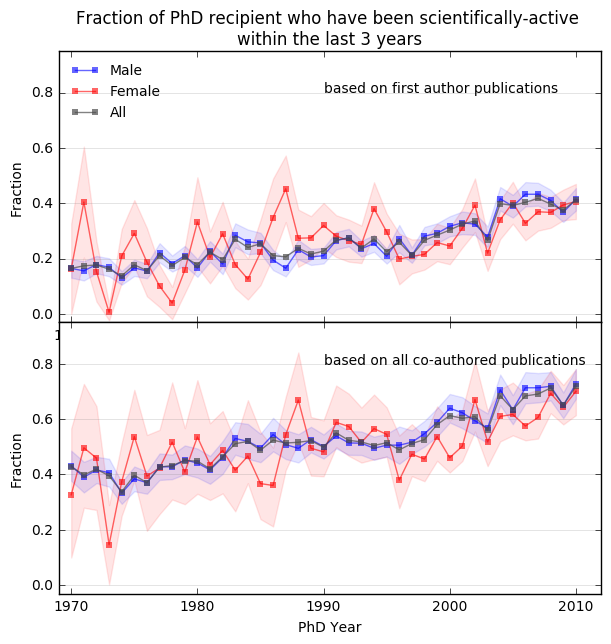

In [158]:
phds = astropy.io.ascii.read('../data/gender_breakdown.dat')[:-8]
f_frac = phds['women']/(phds['women']+phds['men'])

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2011_pub_stats.dat')
files.remove('../data/ads_2012_pub_stats.dat')
files.remove('../data/ads_2013_pub_stats.dat')
files.remove('../data/ads_2014_pub_stats.dat')
files.remove('../data/ads_2015_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')


women_stay_fa = []
women_stay_all = []
women_all = []

men_stay_fa = []
men_stay_all = []
men_all = []

nn_stay_fa = []
nn_stay_all = []
nn_all = []

all_stay_fa = []
all_stay_all = []

#years = np.arange(1970,2011,1)
years = []
nn = 3

for file in files:    
    year = int(file.split('_')[1])
    years.append(year)
    data = ascii.read(file)
    
    #gender = np.array([str(word) for word in data['gender']])
    
    women_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'female')))
    women_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'female'))) 
    women_all.append(np.sum(data['gender'] == 'female'))

    men_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'male')))
    men_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'male')))
    men_all.append(np.sum(data['gender'] == 'male'))

    nn_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_all.append(np.sum(data['gender'] == 'None'))
    
    all_stay_fa.append(np.sum(2017-data['fa_year_last']<=nn))
    all_stay_all.append(np.sum(2017-data['all_year_last']<=nn))

women_all = np.array(women_all)
men_all = np.array(men_all)
nn_all = np.array(nn_all)
    
#fig, ax = plt.subplots(figsize=(9,5))
#ax.set_xlim([1969,2011])
#ax.set_ylim([0.0, 1.0])

fig = plt.figure(1,figsize=(7,7))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([-0.03,0.95])
ax2.set_ylim([-0.03,0.95])
ax1.set_xlim([1969,2012])
ax2.set_xlim([1969,2012])
ax1.set_ylabel('Fraction')
ax2.set_ylabel('Fraction')
ax2.set_xlabel('PhD Year')

ax1.set_title('Fraction of PhD recipient who have been scientifically-active \nwithin the last 3 years')
ax1.text(1990, 0.8,'based on first author publications')
ax2.text(1990, 0.8,'based on all co-authored publications')

#ax1.plot(years, women_stay_fa/women_all, color='red', alpha=0.3, marker='s', mec='None', ms=3)
ax_w = ax1.plot(years, (women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac), color='red', alpha=0.6, marker='s', mec='None', ms=5)
#ax1.plot(years, men_stay_fa/men_all, color='b', alpha=0.3, marker='s', mec='None', ms=3)
ax_m = ax1.plot(years, (men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac)), color='b', alpha=0.6, marker='s', mec='None', ms=5)
ax_all = ax1.plot(years, all_stay_fa/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax1.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
ax1.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax1.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)


#ax2.plot(years, women_stay_all/women_all, color='red', alpha=0.3, marker='s', mec='None', ms=3)
ax2.plot(years, (women_stay_all+nn_leave_all*f_frac)/(women_all+nn_all*f_frac), color='red', alpha=0.6, marker='s', mec='None', ms=5)
#ax2.plot(years, men_stay_all/men_all, color='b', alpha=0.3, marker='s', mec='None', ms=6, ls=':')
ax2.plot(years, (men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac)), color='b', alpha=0.6, marker='s', mec='None', ms=5)
ax2.plot(years, all_stay_all/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax2.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
ax2.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax2.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)

ax1.legend((ax_m[0], ax_w[0], ax_all[0]), ('Male', 'Female', 'All'), loc='upper left', frameon=False, fontsize=10, labelspacing=0.5)

fig.savefig('remain.png', dpi=300)


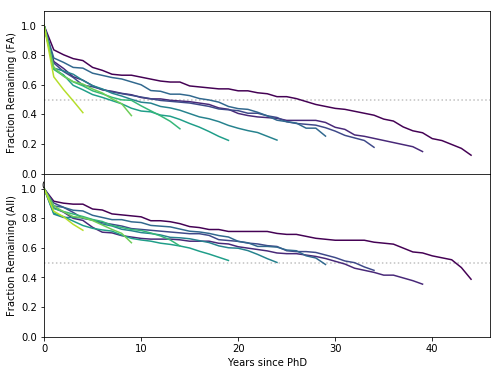

In [222]:
### The discovery of undergrads

#files = glob.glob('../data/ads_*_pub_stats.dat')
#files.remove('../data/ads_2016_pub_stats.dat')
#files.remove('../data/ads_2017_pub_stats.dat')
#files.remove('../data/ads_2018_pub_stats.dat')

files = ['../data/ads_1970_pub_stats.dat','../data/ads_1975_pub_stats.dat','../data/ads_1980_pub_stats.dat','../data/ads_1985_pub_stats.dat',
        '../data/ads_1990_pub_stats.dat','../data/ads_1995_pub_stats.dat','../data/ads_2000_pub_stats.dat','../data/ads_2005_pub_stats.dat',
        '../data/ads_2010_pub_stats.dat']

#years = np.arange(1970,2018,1)

fig = plt.figure(1,figsize=(8,6))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([0.,1.1])
ax2.set_ylim([0.,1.1])
ax1.set_xlim([0, 46])
ax2.set_xlim([0, 46])
ax1.set_ylabel('Fraction Remaining (FA)')
ax2.set_ylabel('Fraction Remaining (All)')
ax2.set_xlabel('Years since PhD')

ax1.plot([0,100],[0.5,0.5],':',color='0.5', alpha=0.5)
ax2.plot([0,100],[0.5,0.5],':',color='0.5', alpha=0.5)

values = np.arange(0,46,1)

jet = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


for file in files:    
    year = int(file.split('_')[1])
    years = np.arange(year, 2015,1)
    data = ascii.read(file)
    
    nn = len(data)
    percent_remaining_fa = []
    percent_remaining_all = []
    for yy in years:
        percent_remaining_fa.append(np.sum(data['fa_year_last']>=yy)/nn)
        percent_remaining_all.append(np.sum(data['all_year_last']>=yy)/nn)
        
    colorVal = scalarMap.to_rgba(year-1970)

    ax1.plot(years-year, percent_remaining_fa, color=colorVal)
    ax2.plot(years-year, percent_remaining_all, color=colorVal)

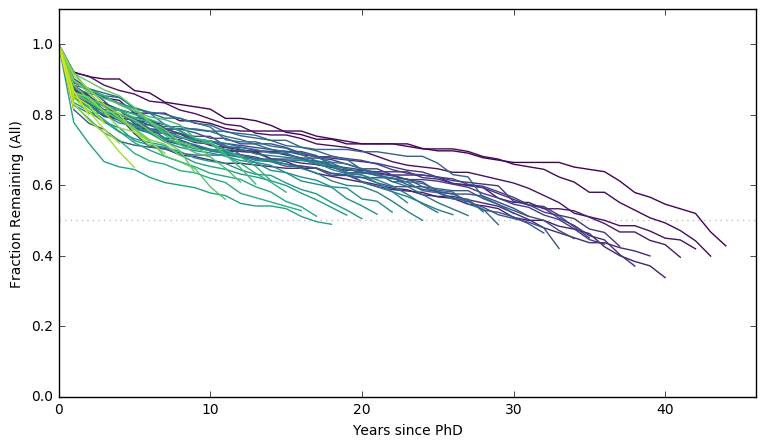

In [60]:
import matplotlib
### The discovery of undergrads

files = glob.glob('../data/ads_*_pub_stats.dat')
files.remove('../data/ads_2016_pub_stats.dat')
files.remove('../data/ads_2017_pub_stats.dat')
files.remove('../data/ads_2018_pub_stats.dat')

#files = ['../data/ads_1970_pub_stats.dat','../data/ads_1975_pub_stats.dat','../data/ads_1980_pub_stats.dat','../data/ads_1985_pub_stats.dat',
#        '../data/ads_1990_pub_stats.dat','../data/ads_1995_pub_stats.dat','../data/ads_2000_pub_stats.dat','../data/ads_2005_pub_stats.dat',
#        '../data/ads_2010_pub_stats.dat']

#years = np.arange(1970,2018,1)

fig, ax2 = plt.subplots(figsize=(9,5))
ax2.set_ylim([0.,1.1])
ax2.set_xlim([0, 46])
ax2.set_ylabel('Fraction Remaining (All)')
ax2.set_xlabel('Years since PhD')

ax2.plot([0,100],[0.5,0.5],':',color='0.5', alpha=0.5)

values = np.arange(0,46,1)

jet = cm = plt.get_cmap('viridis') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)


for file in files:    
    year = int(file.split('_')[1])
    years = np.arange(year, 2015,1)
    data = ascii.read(file)
    
    nn = len(data)
    percent_remaining_fa = []
    percent_remaining_all = []
    for yy in years:
        percent_remaining_fa.append(np.sum(data['fa_year_last']>=yy)/nn)
        percent_remaining_all.append(np.sum(data['all_year_last']>=yy)/nn)
        
    colorVal = scalarMap.to_rgba(year-1970)

    foo = ax2.plot(years-year, percent_remaining_all, color=colorVal)
    
fig.savefig('total_retention.png', dpi=300)

In [10]:
from importlib import reload
import ads
import ads.publications

In [21]:
import requests, os
name = 'Cooper, Nathaniel J.'
phd_year = 2010
year_end = 2019
n_max_pubs = 5
ADS_TOKEN = os.getenv('ADS_TOKEN')

r = requests.get('https://api.adsabs.harvard.edu/v1/search/query',
			params = {'q':'author:("{}")'.format(name),
			'fl':'bibcode,author,year,id,aff',
			'sort':'pubdate desc',
			'rows': '{}'.format(n_max_pubs),
			'fq':'year:[{} TO {}],database:"astronomy",property:refereed'.format(phd_year, year_end)},
			headers={'Authorization':'Bearer:{}'.format(ADS_TOKEN)}
			)

In [22]:
r.json()

{'error': 'Too many requests'}

In [18]:
reload(ads.publications)

<module 'ads.publications' from '/Users/imomcheva/Documents/Career_study/ads_careers/ads/publications.py'>

In [48]:
### last institution
ads.publications.get_all_last_institution()

../data/ads_2010_pub_stats.dat
2010 352 232 0.6590909090909091


Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc (zmq/backend/cython/message.c:4018)
KeyboardInterrupt


dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'response'])
dict_keys(['responseHeader', 'resp

non-US 0.324091508514
R1 0.327548589549
R2/D/L 0.089310508854
F 0.215957756769
P 0.0373670680594


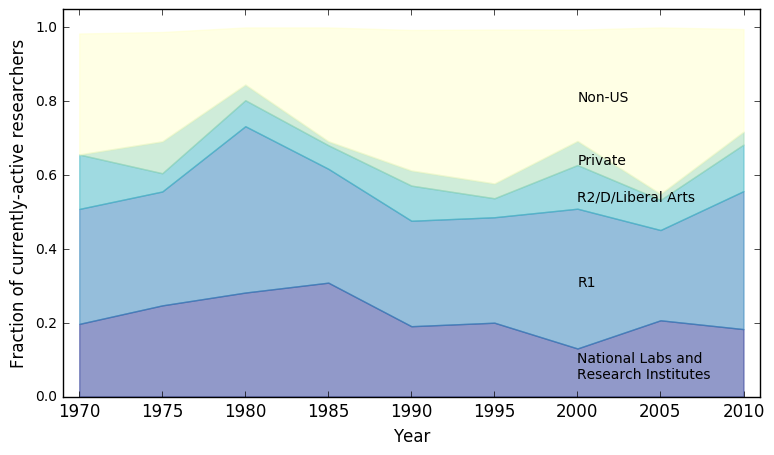

In [157]:
from astropy.io import ascii

files = glob.glob('../data/ads_*_last_institution_carnegie.dat')

years = []
non_us = []
r1 = []
r2 = []
f = []
d = []
l = []
p = []

for file in files:
    data = ascii.read(file,format='no_header',delimiter='|')
    years.append(int(file.split('_')[1]))
    nn_all = len(data)
    non_us.append(np.sum(data['col1'] == 'non-USA')/nn_all)
    r1.append(np.sum(data['col2'] == 'R1')/nn_all)
    r2.append(np.sum(data['col2'] == 'R2')/nn_all)
    f.append(np.sum(data['col2'] == 'F')/nn_all)
    d.append(np.sum(data['col2'] == 'D')/nn_all)
    l.append(np.sum(data['col2'] == 'L')/nn_all)
    p.append(np.sum(data['col2'] == 'P')/nn_all)
    

for label, foo in zip(['non-US', 'R1', 'R2/D/L', 'F', 'P'],[non_us, r1, np.array(r2)+np.array(d)+np.array(l), f, p]):
    print(label,np.mean(foo))

    
fig, ax = plt.subplots(figsize=(9,5))

ax.fill_between(years, np.zeros(len(years)), np.array(f), color='#253494', alpha=0.5)
ax.fill_between(years, np.array(f), np.array(f)+np.array(r1), color='#2c7fb8', alpha=0.5)
ax.fill_between(years, np.array(f)+np.array(r1), np.array(f)+np.array(r1)+np.array(r2)+np.array(d)+np.array(l), color='#41b6c4', alpha=0.5)
ax.fill_between(years, np.array(f)+np.array(r1)+np.array(r2)+np.array(d)+np.array(l), np.array(f)+np.array(r1)+np.array(r2)+np.array(d)+np.array(l)+np.array(p), color='#a1dab4', alpha=0.5)
ax.fill_between(years, np.array(f)+np.array(r1)+np.array(r2)+np.array(d)+np.array(l)+np.array(p), np.array(f)+np.array(r1)+np.array(r2)+np.array(d)+np.array(l)+np.array(p)+np.array(non_us), color='#ffffcc', alpha=0.5)

ax.set_ylabel('Fraction of currently-active researchers', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1969, 2011])
ax.set_ylim([0, 1.05])

ax.text(2000, 0.8, 'Non-US')
ax.text(2000, 0.63, 'Private')
ax.text(2000, 0.53, 'R2/D/Liberal Arts')
ax.text(2000, 0.3, 'R1')
ax.text(2000, 0.05, 'National Labs and\nResearch Institutes')

plt.show(block=False)

#fig.savefig('carnegie.png', dpi=300)




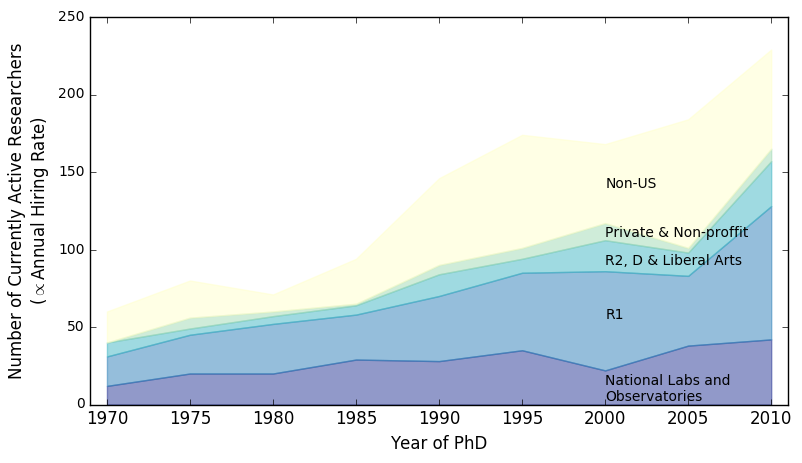

In [150]:
from astropy.io import ascii

files = glob.glob('../data/ads_*_last_institution_carnegie.dat')


years = np.array([])
non_us = np.array([])
r1 = np.array([])
r2 = np.array([])
f = np.array([])
d = np.array([])
l = np.array([])
p = np.array([])

for file in files:
    data = ascii.read(file,format='no_header',delimiter='|')
    years = np.append(years, int(file.split('_')[1]))
    nn_all = len(data)
    non_us = np.append(non_us, np.sum(data['col1'] == 'non-USA'))
    r1 = np.append(r1, np.sum(data['col2'] == 'R1'))
    r2 = np.append(r2, np.sum(data['col2'] == 'R2'))
    f = np.append(f, np.sum(data['col2'] == 'F'))
    d = np.append(d, np.sum(data['col2'] == 'D'))
    l = np.append(l, np.sum(data['col2'] == 'L'))
    p = np.append(p, np.sum(data['col2'] == 'P'))
    

fig, ax = plt.subplots(figsize=(9,5))

ax.fill_between(years, np.zeros(len(years)), f, color='#253494', alpha=0.5)
ax.fill_between(years, f, f+r1, color='#2c7fb8', alpha=0.5)
ax.fill_between(years, f+r1, f+r1+r2+l+d, color='#41b6c4', alpha=0.5)
ax.fill_between(years, f+r1+r2+l+d, f+r1+r2+l+d+p, color='#a1dab4', alpha=0.5)
ax.fill_between(years, f+r1+r2+l+d+p, f+r1+r2+l+d+p+non_us, color='#ffffcc', alpha=0.5)

ax.set_ylabel('Number of Currently Active Researchers\n($\propto$Annual Hiring Rate)', fontsize=12)
ax.set_xlabel('Year of PhD', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1969, 2011])
ax.set_ylim([0, 250])

ax.text(2000, 140, 'Non-US')
ax.text(2000, 108, 'Private & Non-proffit')
ax.text(2000, 90, 'R2, D & Liberal Arts')
ax.text(2000, 55, 'R1')
ax.text(2000, 2, 'National Labs and\nObservatories')

plt.show(block=False)

fig.savefig('carnegie.png', dpi=300)

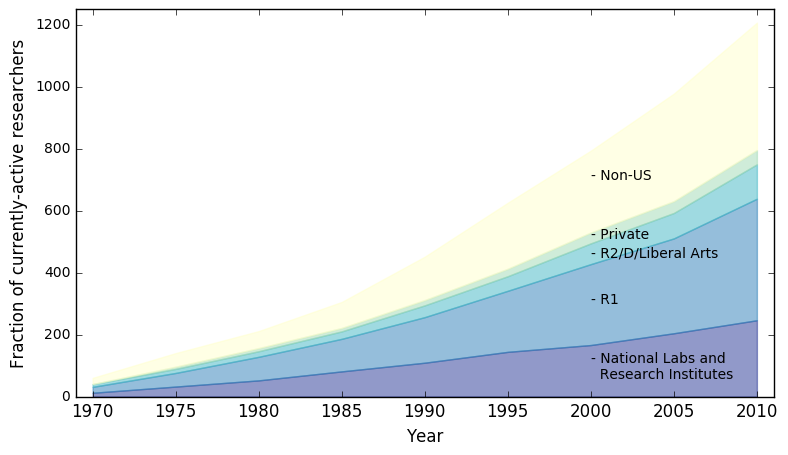

In [132]:
from astropy.io import ascii

files = glob.glob('../data/ads_*_last_institution_carnegie.dat')

years = np.array([])
non_us = np.array([])
r1 = np.array([])
r2 = np.array([])
f = np.array([])
d = np.array([])
l = np.array([])
p = np.array([])

for file in files:
    data = ascii.read(file,format='no_header',delimiter='|')
    years = np.append(years, int(file.split('_')[1]))
    nn_all = len(data)
    non_us = np.append(non_us, np.sum(data['col1'] == 'non-USA'))
    r1 = np.append(r1, np.sum(data['col2'] == 'R1'))
    r2 = np.append(r2, np.sum(data['col2'] == 'R2'))
    f = np.append(f, np.sum(data['col2'] == 'F'))
    d = np.append(d, np.sum(data['col2'] == 'D'))
    l = np.append(l, np.sum(data['col2'] == 'L'))
    p = np.append(p, np.sum(data['col2'] == 'P'))
    

fig, ax = plt.subplots(figsize=(9,5))

ax.fill_between(years, np.zeros(len(years)), np.cumsum(f), color='#253494', alpha=0.5)
ax.fill_between(years, np.cumsum(f), np.cumsum(f)+np.cumsum(r1), color='#2c7fb8', alpha=0.5)
ax.fill_between(years, np.cumsum(f)+np.cumsum(r1), np.cumsum(f)+np.cumsum(r1)+np.cumsum(r2)+np.cumsum(d)+np.cumsum(l), color='#41b6c4', alpha=0.5)
ax.fill_between(years, np.cumsum(f)+np.cumsum(r1)+np.cumsum(r2)+np.cumsum(d)+np.cumsum(l), np.cumsum(f)+np.cumsum(r1)+np.cumsum(r2)+np.cumsum(d)+np.cumsum(l)+np.cumsum(p), color='#a1dab4', alpha=0.5)
ax.fill_between(years, np.cumsum(f)+np.cumsum(r1)+np.cumsum(r2)+np.cumsum(d)+np.cumsum(l)+np.cumsum(p), np.cumsum(f)+np.cumsum(r1)+np.cumsum(r2)+np.cumsum(d)+np.cumsum(l)+np.cumsum(p)+np.cumsum(non_us), color='#ffffcc', alpha=0.5)

ax.set_ylabel('Fraction of currently-active researchers', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2019, 5))
ax.set_xticklabels(np.arange(1970, 2019, 5), fontsize=12)
ax.set_xlim([1969, 2011])
ax.set_ylim([0, 1250])

ax.text(2000, 700, '- Non-US')
ax.text(2000, 510, '- Private')
ax.text(2000, 450, '- R2/D/Liberal Arts')
ax.text(2000, 300, '- R1')
ax.text(2000, 60, '- National Labs and\n  Research Institutes')

plt.show(block=False)

#fig.savefig('carnegie.png', dpi=300)

In [ ]:

### Do the two above add up?
fig = plt.figure(1,figsize=(8,6))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([-0.03,1.1])
ax2.set_ylim([-0.03,1.1])
ax1.set_xlim([1969,2011])
ax2.set_xlim([1969,2011])

ax1.plot(years, all_leave_fa/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax1.plot(years, all_stay_fa/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7,ls=':')
ax1.plot(years, (np.array(all_stay_fa)+np.array(all_leave_fa))/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7,ls=':')

ax2.plot(years, all_leave_all/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax2.plot(years, all_stay_all/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)
ax2.plot(years, (np.array(all_leave_all)+np.array(all_stay_all))/phds['all'], color='0.3', marker='s', mec='None', ms=5, alpha=0.7)


In [544]:
### Hubble fellows
### pull the data about Hubble fellows from the list of all PhD recipients
### limit to those 1990-2010: total 258
# publications.hubble_fellows()
# output is in ../data/hubble_pubs_stats.dat
# then manually check the ones that did not match: found a couple
# 17 Hubble fellows from US institutions are not in the database
# = 6.5% incompleteness of the results
# 63 fellows came from non-US PhD institutions
# = 24%

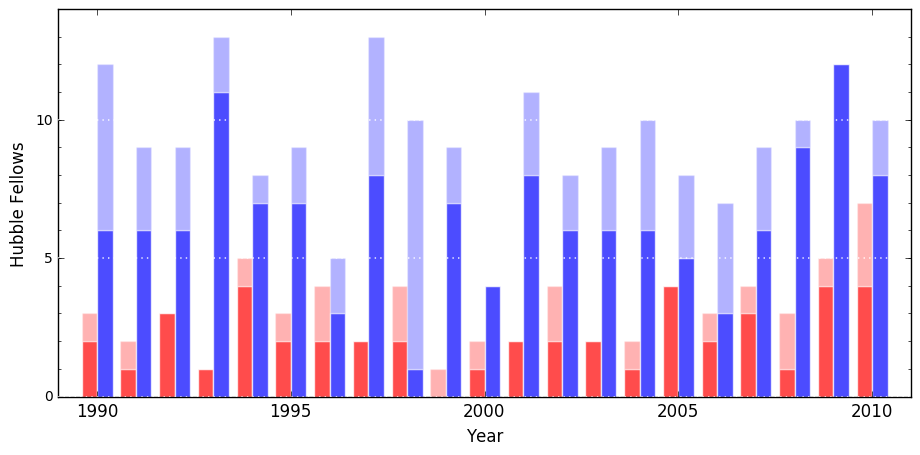

In [548]:
"""
Plot a histogram with red and blue bars next to each other,
showing the number of PhDs from each gender
"""

hubble_data = ascii.read('../data/hubble_pubs_stats.dat')

hubble_all = []
hubble_male = []
hubble_female = []
years = np.arange(1990, 2011,1)
for_all = [7,4,3,2,2,3,4,5,11,3,1,3,4,3,5,3,5,4,3,1,5]
for_f = [1,1,0,0,1,1,2,0,2,1,1,0,2,0,1,0,1,1,2,1,3]
for_m = [6,3,3,2,1,2,2,5,9,2,0,3,2,3,4,3,4,3,1,0,2]

for year in years:
    index = (hubble_data['hubble_year'] == year)
    hubble_all.append(np.sum(index))
    hubble_male.append(np.sum(index & (hubble_data['gender'] == 'male')))
    hubble_female.append(np.sum(index & (hubble_data['gender'] == 'female')))    

width=0.4
fig, ax = plt.subplots(figsize=(11,5))

f_frac = np.array(hubble_female)/(np.array(hubble_female)+np.array(hubble_male))

women = ax.bar(years, hubble_female, width*-1, color='red',  alpha=0.7, edgecolor='white',align='edge')	
women_plus = ax.bar(years, for_f, width*-1, color='red', alpha=0.3, edgecolor='white',align='edge', bottom=hubble_female)

men = ax.bar(years, hubble_male, width, color='b', alpha=0.7, edgecolor='white', align='edge')	
women_plus = ax.bar(years, for_m, width, color='b', alpha=0.3, edgecolor='white',align='edge', bottom=hubble_male)

ax.set_ylabel('Hubble Fellows', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2011, 5))
ax.set_xticklabels(np.arange(1970, 2011, 5), fontsize=12)
ax.set_xlim([1989, 2011])
ax.set_ylim([0, 14])

major_yticks = np.arange(0, 14, 5)                                              
minor_yticks = np.arange(0, 14, 1)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                


Overall fraction of female Hubble fellows: 0.2585551330798479
Total number of Hubble fellows: 263
Total number of US PhD Hubble fellows: 182


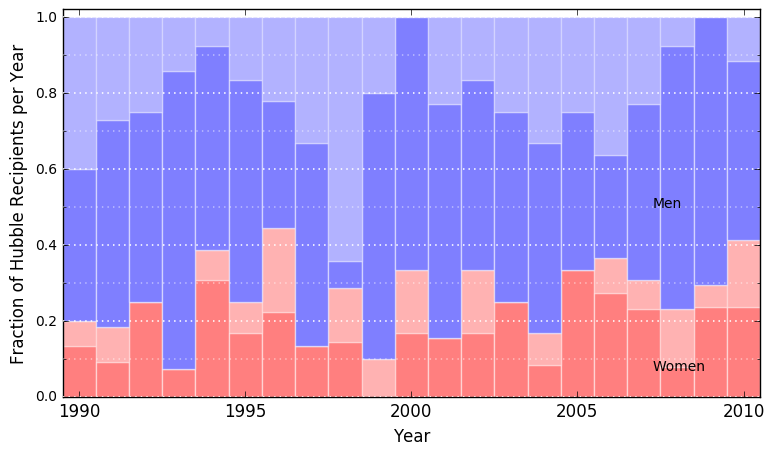

In [679]:
"""
Plot a histogram with red and blue bars next to each other,
showing the number of PhDs from each gender
"""

hubble_data = ascii.read('../data/hubble_pubs_stats.dat')

hubble_all = []
hubble_male = []
hubble_female = []
years = np.arange(1990, 2011,1)
for_all = np.array([7,4,3,2,2,3,4,5,11,3,1,3,4,3,5,3,5,4,3,1,5])
for_f = np.array([1,1,0,0,1,1,2,0,2,1,1,0,2,0,1,0,1,1,2,1,3])
for_m = np.array([6,3,3,2,1,2,2,5,9,2,0,3,2,3,4,3,4,3,1,0,2])

for year in years:
    index = (hubble_data['hubble_year'] == year)
    hubble_all.append(np.sum(index))
    hubble_male.append(np.sum(index & (hubble_data['gender'] == 'male')))
    hubble_female.append(np.sum(index & (hubble_data['gender'] == 'female')))    

hubble_all = np.array(hubble_all)
hubble_male = np.array(hubble_male)
hubble_female = np.array(hubble_female)

width=1.
fig, ax = plt.subplots(figsize=(9,5))

women = ax.bar(years, hubble_female/(hubble_all+for_all), width, color='red',  alpha=0.5, edgecolor='white',align='center')	
women = ax.bar(years, for_f/(hubble_all+for_all), width, color='red',  alpha=0.3, edgecolor='white',align='center', bottom=hubble_female/(hubble_all+for_all))	
men = ax.bar(years, hubble_male/(hubble_all+for_all), width, color='b', alpha=0.5, edgecolor='white', bottom=(hubble_female+for_f)/(hubble_all+for_all),align='center')	
men = ax.bar(years, for_m/(hubble_all+for_all), width, color='b', alpha=0.3, edgecolor='white', bottom=(hubble_female+for_f+hubble_male)/(hubble_all+for_all),align='center')	

#print(phds['women']/all)

ax.set_ylabel('Fraction of Hubble Recipients per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1990, 2011, 5))
ax.set_xticklabels(np.arange(1990, 2011, 5), fontsize=12)
ax.set_xlim([1989.5, 2010.5])
ax.set_ylim([0, 1.02])

major_yticks = np.arange(0, 1.1, 0.2)                                              
minor_yticks = np.arange(0, 1.1, 0.1)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

ax.text(2007.25, 0.5, 'Men')
ax.text(2007.25, 0.07, 'Women')
#ax.yaxis.grid(True, color='1.0', linestyle=':', lw=1.1)
ax.yaxis.grid(which='minor', alpha=0.5, color='1.0', linestyle=':', lw=1.1)                                                
ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                

#fig.savefig('../plots/number_phds_gender.png', dpi=300)
print('Overall fraction of female Hubble fellows: {}'.format(np.sum(hubble_female+for_f)/np.sum(hubble_all+for_all)))
print('Total number of Hubble fellows: {}'.format(np.sum(hubble_all+for_all)))
print('Total number of US PhD Hubble fellows: {}'.format(np.sum(hubble_all)))


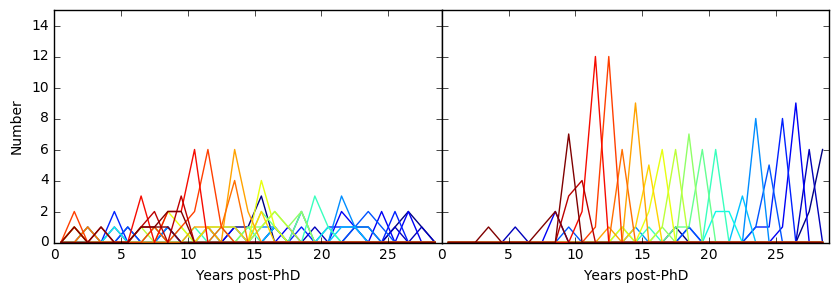

In [579]:
hubble_data = ascii.read('../data/hubble_pubs_stats.dat')

years = np.arange(1990,2011,1)

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,15])
ax2.set_ylim([0,15])
ax1.set_xlim([0,29])
ax2.set_xlim([0,29])
ax2.set_yticklabels([])

ax1.set_ylabel('Number')
ax1.set_xlabel('Years post-PhD')
ax2.set_xlabel('Years post-PhD')

values = np.arange(0,20,1)

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,30,1)

for year in years:
    
    index = (hubble_data['phd_year'] == year)
    #print(year, np.sum(index), np.unique(hubble_data['phd_year'][index]))
    colorVal = scalarMap.to_rgba(year-1990)
    
    fa_n, fa_bins = np.histogram(hubble_data['fa_year_last'][index]-year+1, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(hubble_data['all_year_last'][index]-year+1, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n, color=colorVal)
    ax2.plot(all_center, all_n, color=colorVal)


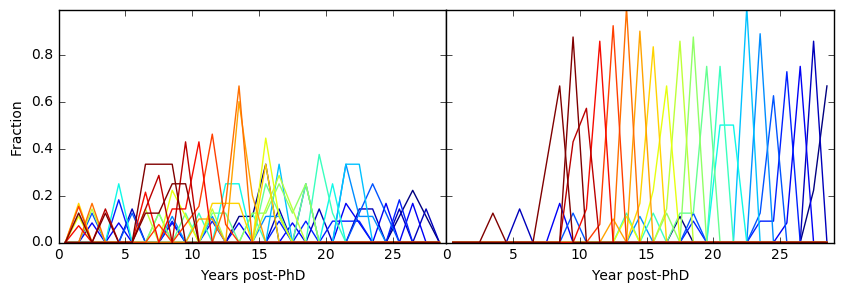

In [581]:
hubble_data = ascii.read('../data/hubble_pubs_stats.dat')

years = np.arange(1990,2011,1)

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,0.99])
ax2.set_ylim([0,0.99])
ax1.set_xlim([0,29])
ax2.set_xlim([0,29])
ax2.set_yticklabels([])

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Years post-PhD')
ax2.set_xlabel('Year post-PhD')

values = np.arange(0,20,1)

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,30,1)

for year in years:
    
    index = (hubble_data['phd_year'] == year)
    #print(year, np.sum(index), np.unique(hubble_data['phd_year'][index]))
    colorVal = scalarMap.to_rgba(year-1990)
    
    fa_n, fa_bins = np.histogram(hubble_data['fa_year_last'][index]-year+1, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(hubble_data['all_year_last'][index]-year+1, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n/np.sum(index), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(index), color=colorVal)


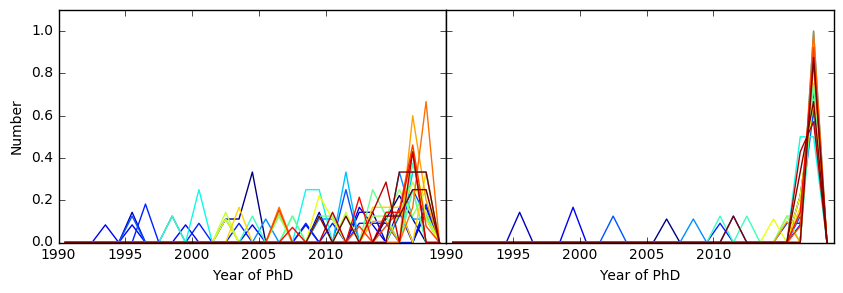

In [580]:
hubble_data = ascii.read('../data/hubble_pubs_stats.dat')

years = np.arange(1990,2011,1)

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,1.1])
ax2.set_ylim([0,1.1])
ax1.set_xlim([0,29])
ax2.set_xlim([0,29])
ax2.set_yticklabels([])

labels = ['1990', '1995', '2000', '2005','2010']
ax1.set_xticks(np.array([0,5,10,15,20]))
ax1.set_xticklabels(labels)
ax2.set_xticks(np.array([0,5,10,15,20]))
ax2.set_xticklabels(labels)

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Year of PhD')
ax2.set_xlabel('Year of PhD')

values = np.arange(0,20,1)

jet = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,30,1)

for year in years:
    
    index = (hubble_data['phd_year'] == year)
    #print(year, np.sum(index), np.unique(hubble_data['phd_year'][index]))
    colorVal = scalarMap.to_rgba(year-1990)
    
    fa_n, fa_bins = np.histogram(hubble_data['fa_year_last'][index]-1990, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(hubble_data['all_year_last'][index]-1990, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    #ax1.plot(fa_center, fa_n, color=colorVal)
    #ax2.plot(all_center, all_n, color=colorVal)
    ax1.plot(fa_center, fa_n/np.sum(index), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(index), color=colorVal)


[0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 1, 2, 1, 2, 2, 3, 3, 3, 2, 0]
[1, 0, 1, 3, 1, 4, 1, 0, 1, 2, 1, 3, 3, 2, 2, 2, 3, 4, 4, 2, 0]
[2, 0, 2, 4, 1, 5, 1, 0, 1, 2, 1, 3, 3, 2, 2, 2, 3, 4, 4, 2, 0]


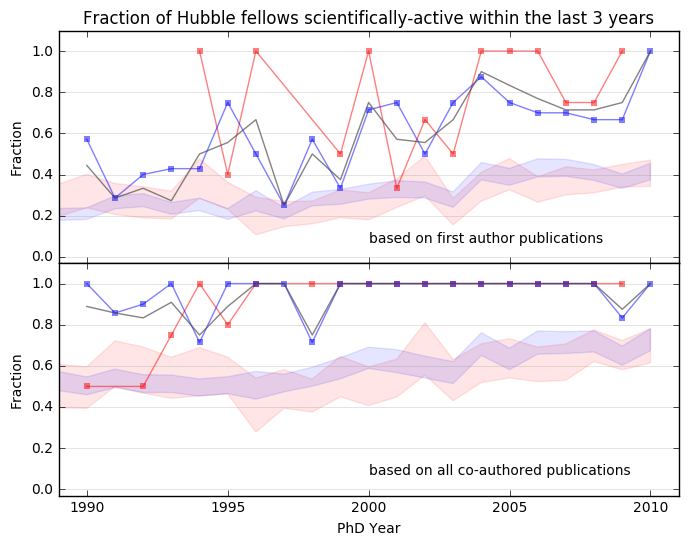

In [666]:
phds = astropy.io.ascii.read('../data/gender_breakdown.dat', )
f_frac = (phds['women']/(phds['women']+phds['men']))

files = glob.glob('../data/ads_*_pub_stats.dat')

women_stay_fa = []
women_stay_all = []
women_all = []

men_stay_fa = []
men_stay_all = []
men_all = []

nn_stay_fa = []
nn_stay_all = []
nn_all = []

all_stay_fa = []
all_stay_all = []

years = np.arange(1970,2011,1)

nn = 3

for file in files:    
    year = int(file.split('_')[1])
    data = ascii.read(file)
    
    #gender = np.array([str(word) for word in data['gender']])
    
    women_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'female')))
    women_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'female'))) 
    women_all.append(np.sum(data['gender'] == 'female'))

    men_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'male')))
    men_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'male')))
    men_all.append(np.sum(data['gender'] == 'male'))

    nn_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_all.append(np.sum(data['gender'] == 'None'))
    
    all_stay_fa.append(np.sum(2017-data['fa_year_last']<=nn))
    all_stay_all.append(np.sum(2017-data['all_year_last']<=nn))
    
hubble_women_stay_fa = []
hubble_women_stay_all = []
hubble_women_all = []

hubble_men_stay_fa = []
hubble_men_stay_all = []
hubble_men_all = []

hubble_all_stay_fa = []
hubble_all_stay_all = []
hubble_all = []

hubble_data = ascii.read('../data/hubble_pubs_stats.dat')
hubble_years = np.arange(1990,2011,1)

for year in hubble_years:
    index = hubble_data['phd_year'] == year
    hubble_women_stay_fa.append(np.sum((2017 - hubble_data['fa_year_last'][index] <=nn) & (hubble_data['gender'][index] == 'female')))
    hubble_women_stay_all.append(np.sum((2017 - hubble_data['all_year_last'][index] <=nn) & (hubble_data['gender'][index] == 'female')))
    hubble_women_all.append(np.sum(hubble_data['gender'][index] == 'female'))
    hubble_men_stay_fa.append(np.sum((2017 - hubble_data['fa_year_last'][index] <=nn) & (hubble_data['gender'][index] == 'male')))
    hubble_men_stay_all.append(np.sum((2017 - hubble_data['all_year_last'][index] <=nn) & (hubble_data['gender'][index] == 'male')))
    hubble_men_all.append(np.sum(hubble_data['gender'][index] == 'male'))
    hubble_all_stay_fa.append(np.sum(2017 - hubble_data['fa_year_last'][index] <=nn))
    hubble_all_stay_all.append(np.sum(2017 - hubble_data['all_year_last'][index] <=nn))
    hubble_all.append(np.sum(index))
    
print(hubble_women_stay_fa)
print(hubble_women_stay_all)
print(hubble_women_all)
women_all = np.array(women_all)
men_all = np.array(men_all)
nn_all = np.array(nn_all)

hubble_women_stay_fa = np.array(hubble_women_stay_fa)
hubble_women_stay_all = np.array(hubble_women_stay_all)
hubble_women_all = np.array(hubble_women_all)
hubble_men_stay_fa = np.array(hubble_men_stay_fa)
hubble_men_stay_all = np.array(hubble_men_stay_all)
hubble_men_all = np.array(hubble_men_all)
hubble_all_stay_fa = np.array(hubble_all_stay_fa)
hubble_all_stay_all = np.array(hubble_all_stay_all)


fig = plt.figure(1,figsize=(8,6))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([-0.03,1.1])
ax2.set_ylim([-0.03,1.1])
ax1.set_xlim([1989,2011])
ax2.set_xlim([1989,2011])

ax1.set_ylabel('Fraction')
ax2.set_ylabel('Fraction')
ax2.set_xlabel('PhD Year')

ax1.set_title('Fraction of Hubble fellows scientifically-active within the last 3 years')
ax1.text(2000, 0.07,'based on first author publications')
ax2.text(2000, 0.07,'based on all co-authored publications')

ii = hubble_women_stay_fa > 0
jj = hubble_men_stay_fa > 0
ax1.plot(hubble_years[ii], hubble_women_stay_fa[ii]/hubble_women_all[ii], color='red', alpha=0.5, marker='s', mec='None', ms=5)
ax1.plot(hubble_years[jj], hubble_men_stay_fa[jj]/hubble_men_all[jj], color='b', alpha=0.5, marker='s', mec='None', ms=5)
ax1.plot(hubble_years, hubble_all_stay_fa/hubble_all, color='0.3', mec='None', ms=5, alpha=0.7)
ax1.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
ax1.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax1.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)

ii = hubble_women_stay_all > 0
jj = hubble_men_stay_all > 0
ax2.plot(hubble_years[ii], hubble_women_stay_all[ii]/hubble_women_all[ii], color='red', alpha=0.5, marker='s', mec='None', ms=5)
ax2.plot(hubble_years[jj], hubble_men_stay_all[jj]/hubble_men_all[jj], color='b', alpha=0.5, marker='s', mec='None', ms=5)
ax2.plot(hubble_years, hubble_all_stay_all/hubble_all, color='0.3', mec='None', ms=5, alpha=0.7)
ax2.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
ax2.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax2.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)


In [619]:
### Top 10 school graduates
### list of schools is in ../data/top_astro_programs.dat
### cull my mist of US schools to only include these programs ... ugh
#years = np.arange(1970,2011,1)
#for year in years:
#    publications.top_ten(phd_year = year)

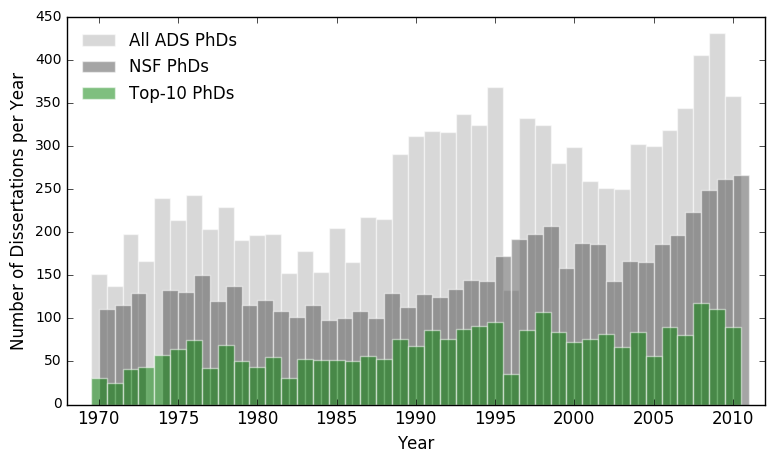

In [671]:
phds = ascii.read('../../number_of_phds.dat', format='commented_header')

width=1.0
fig, ax = plt.subplots(figsize=(9,5))

ads_phds = ax.bar(phds['year'], phds['ads'], width, color='0.7', alpha=0.5, edgecolor='white', align='center')
nsf_phds = ax.bar(phds['year']+0.5, phds['nsf'], width, color='0.3', alpha=0.5, edgecolor='white', align='center')
top_phds = ax.bar(phds['year'], phds['top_10'], width, color='green', alpha=0.5, edgecolor='white', align='center')

ax.set_ylabel('Number of Dissertations per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2011, 5))
ax.set_xticklabels(np.arange(1970, 2011, 5), fontsize=12)
ax.set_xlim([1968, 2012])
ax.set_ylim([0, 450])

ax.legend((ads_phds[0], nsf_phds[0], top_phds[0]), ('All ADS PhDs','NSF PhDs', 'Top-10 PhDs'), loc='upper left', frameon=False)


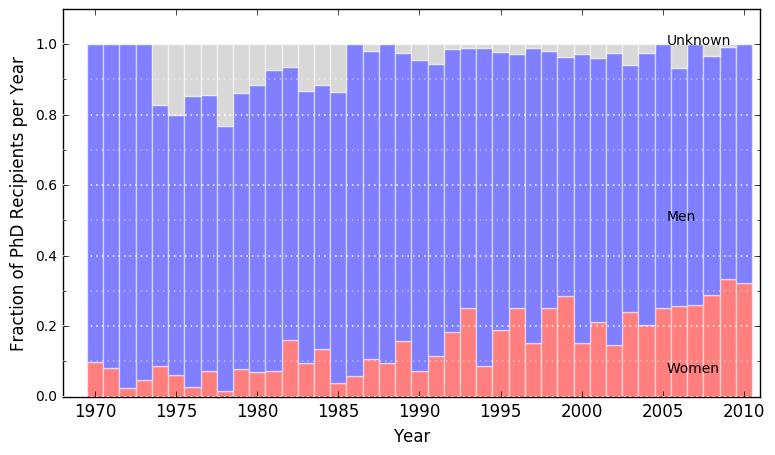

In [672]:
"""
Plot a histogram with 100% bars, colored by the fraction of PhDs of each gender.
"""

phds = ascii.read('../../number_of_phds.dat', format='commented_header')
all = np.array(phds['top_10'], dtype=float)
nodata = all - phds['top_10_men'] - phds['top_10_women']

width=1.
fig, ax = plt.subplots(figsize=(9,5))

women = ax.bar(phds['year'], phds['top_10_women']/all, width, color='red',  alpha=0.5, edgecolor='white',align='center')	
men = ax.bar(phds['year'], phds['top_10_men']/all, width, color='b', alpha=0.5, edgecolor='white', bottom=(phds['top_10_women']/all),align='center')	
nodata = ax.bar(phds['year'], nodata/all, width, color='0.7', bottom=((phds['top_10_men']+phds['top_10_women'])/all), alpha=0.5, edgecolor='white',align='center')	

#print(phds['women']/all)

ax.set_ylabel('Fraction of PhD Recipients per Year', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2011, 5))
ax.set_xticklabels(np.arange(1970, 2011, 5), fontsize=12)
ax.set_xlim([1968, 2011])
ax.set_ylim([0, 1.1])

major_yticks = np.arange(0, 1.1, 0.2)                                              
minor_yticks = np.arange(0, 1.1, 0.1)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

ax.text(2005.25, 1.0, 'Unknown')
ax.text(2005.25, 0.5, 'Men')
ax.text(2005.25, 0.07, 'Women')
#ax.yaxis.grid(True, color='1.0', linestyle=':', lw=1.1)
ax.yaxis.grid(which='minor', alpha=0.5, color='1.0', linestyle=':', lw=1.1)                                                
ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                

#fig.savefig('../plots/number_phds_gender.png', dpi=300)


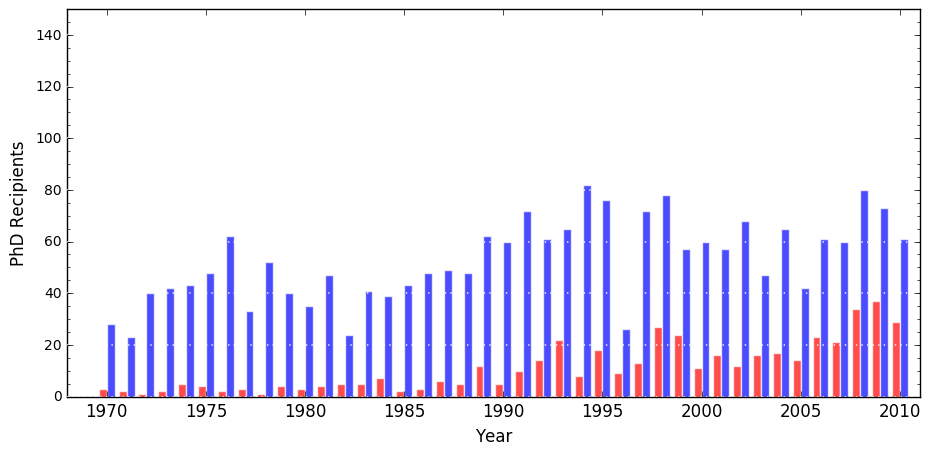

In [673]:
"""
Plot a histogram with red and blue bars next to each other,
showing the number of PhDs from each gender
"""

phds = ascii.read('../../number_of_phds.dat', format='commented_header')
all = np.array(phds['ads'], dtype=float)

width=0.4
fig, ax = plt.subplots(figsize=(11,5))

f_frac = phds['top_10_women']/(phds['top_10_women']+phds['top_10_men'])

women = ax.bar(phds['year'], phds['top_10_women'], width*-1, color='red',  alpha=0.7, edgecolor='white',align='edge')	
#women_plus = ax.bar(phds['year'], phds['nodata']*f_frac, width*-1, color='red', alpha=0.3, edgecolor='white',align='edge', bottom=phds['women'])

men = ax.bar(phds['year'], phds['top_10_men'], width, color='b', alpha=0.7, edgecolor='white', align='edge')	
#men = ax.bar(phds['year'], phds['nodata']*(1-f_frac), width, color='b', alpha=0.3, edgecolor='white', align='edge', bottom=phds['men'])	

ax.set_ylabel('PhD Recipients', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
ax.set_xticks(np.arange(1970, 2011, 5))
ax.set_xticklabels(np.arange(1970, 2011, 5), fontsize=12)
ax.set_xlim([1968, 2011])
ax.set_ylim([0, 150])

major_yticks = np.arange(0, 150, 20)                                              
minor_yticks = np.arange(0, 150, 5)                                               
ax.set_yticks(major_yticks)                                                       
ax.set_yticks(minor_yticks, minor=True)                                           

ax.yaxis.grid(which='major', alpha=0.9, color='1.0', linestyle=':', lw=1.1)                                                



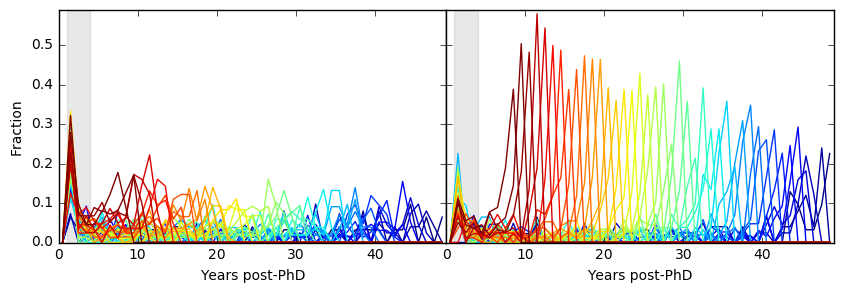

In [674]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import glob

files = glob.glob('../data/ads_*_pub_stats_top10.dat')

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0.0,0.59])
ax2.set_ylim([0.0,0.59])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Years post-PhD')
ax2.set_xlabel('Years post-PhD')


ax1.fill_between([1,4],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)
ax2.fill_between([1,4],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)

values = np.arange(0,40,1)

jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-year+1, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-year+1, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n/np.sum(fa_n), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(all_n), color=colorVal)


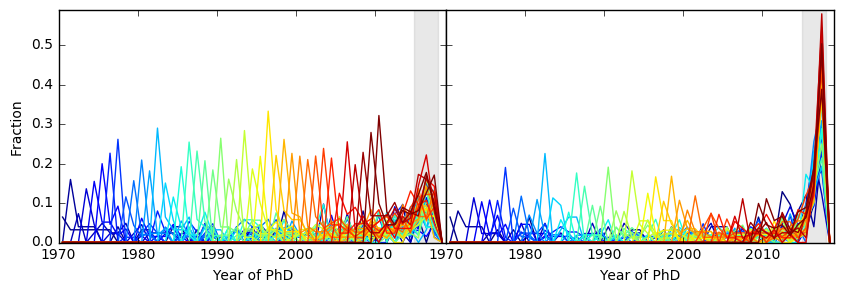

In [675]:
files = glob.glob('../data/ads_*_pub_stats_top10.dat')

fig = plt.figure(1,figsize=(10, 3))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.set_ylim([0,0.59])
ax2.set_ylim([0,0.59])
ax1.set_xlim([0,49])
ax2.set_xlim([0,49])
ax2.set_yticklabels([])

labels = ['1970', '1980', '1990', '2000','2010']
ax1.set_xticks(np.array([0,10,20,30,40]))
ax1.set_xticklabels(labels)
ax2.set_xticks(np.array([0,10,20,30,40]))
ax2.set_xticklabels(labels)

ax1.set_ylabel('Fraction')
ax1.set_xlabel('Year of PhD')
ax2.set_xlabel('Year of PhD')

ax1.fill_between([45,48],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)
ax2.fill_between([45,48],[0,0],y2=[1,1], color=['0.7'], alpha=0.3)


values = np.arange(0,40,1)

jet = cm = plt.get_cmap('jet') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)

bins = np.arange(0,50,1)

for file in files:
    year = int(file.split('_')[1])
    
    colorVal = scalarMap.to_rgba(year-1970)
    #print(file, colorVal)
    
    data = ascii.read(file)
    
    fa_n, fa_bins = np.histogram(data['fa_year_last']-1970, bins=bins)
    fa_center = (fa_bins[1:] + fa_bins[:-1])/2
    all_n, all_bins = np.histogram(data['all_year_last']-1970, bins=bins)
    all_center = (all_bins[1:]+all_bins[:-1])/2
    ax1.plot(fa_center, fa_n/np.sum(fa_n), color=colorVal)
    ax2.plot(all_center, all_n/np.sum(all_n), color=colorVal)


[ 4  5  8 10 17  8 16 14 13 10 12 18  5 17 14 12 12 11 14 23 17 25 26 19 24
 29 12 22 33 28 26 26 31 24 32 24 44 42 49 50 42]
[31, 25, 41, 44, 58, 65, 75, 42, 69, 51, 43, 55, 31, 53, 52, 52, 51, 56, 53, 76, 68, 87, 76, 88, 91, 96, 36, 86, 107, 84, 73, 76, 82, 67, 84, 56, 90, 81, 118, 111, 90]
0.0228966771805 0.011737011737
0.0460923248197 0.0337582852256
0.0654796450939 0.0351046698873
0.0809863385038 0.0880413913615


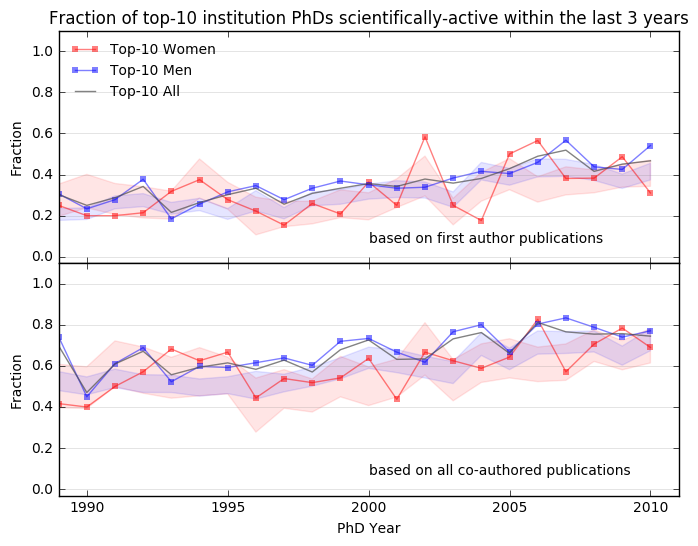

In [678]:
phds = astropy.io.ascii.read('../data/gender_breakdown.dat', )
f_frac = (phds['women']/(phds['women']+phds['men']))

files = glob.glob('../data/ads_*_pub_stats.dat')
top10_files = glob.glob('../data/ads_*_pub_stats_top10.dat')

women_stay_fa = []
women_stay_all = []
women_all = []

men_stay_fa = []
men_stay_all = []
men_all = []

nn_stay_fa = []
nn_stay_all = []
nn_all = []

all_stay_fa = []
all_stay_all = []

top10_women_stay_fa = []
top10_women_stay_all = []
top10_women_all = []

top10_men_stay_fa = []
top10_men_stay_all = []
top10_men_all = []

top10_nn_stay_fa = []
top10_nn_stay_all = []
top10_nn_all = []

top10_all_stay_fa = []
top10_all_stay_all = []
top10_all = []

years = np.arange(1970,2011,1)

nn = 3

for file, top10_file in zip(files, top10_files):    
    year = int(file.split('_')[1])
    data = ascii.read(file)
    top10_data = ascii.read(top10_file)
    
    #gender = np.array([str(word) for word in data['gender']])
    
    women_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'female')))
    women_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'female'))) 
    women_all.append(np.sum(data['gender'] == 'female'))

    men_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'male')))
    men_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'male')))
    men_all.append(np.sum(data['gender'] == 'male'))

    nn_stay_fa.append(np.sum((2017-data['fa_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_stay_all.append(np.sum((2017-data['all_year_last'] <=nn) & (data['gender'] == 'None')))
    nn_all.append(np.sum(data['gender'] == 'None'))
    
    all_stay_fa.append(np.sum(2017-data['fa_year_last']<=nn))
    all_stay_all.append(np.sum(2017-data['all_year_last']<=nn))
    
    top10_women_stay_fa.append(np.sum((2017 - top10_data['fa_year_last'] <=nn) & (top10_data['gender'] == 'female')))
    top10_women_stay_all.append(np.sum((2017 - top10_data['all_year_last'] <=nn) & (top10_data['gender'] == 'female')))
    top10_women_all.append(np.sum(top10_data['gender'] == 'female'))

    top10_men_stay_fa.append(np.sum((2017 - top10_data['fa_year_last'] <=nn) & (top10_data['gender'] == 'male')))
    top10_men_stay_all.append(np.sum((2017 - top10_data['all_year_last'] <=nn) & (top10_data['gender'] == 'male')))
    top10_men_all.append(np.sum(top10_data['gender'] == 'male'))

    top10_nn_stay_fa.append(np.sum((2017-top10_data['fa_year_last'] <=nn) & (top10_data['gender'] == 'None')))
    top10_nn_stay_all.append(np.sum((2017-top10_data['all_year_last'] <=nn) & (top10_data['gender'] == 'None')))
    top10_nn_all.append(np.sum(top10_data['gender'] == 'None'))
    
    top10_all_stay_fa.append(np.sum(2017 - top10_data['fa_year_last'] <=nn))
    top10_all_stay_all.append(np.sum(2017 - top10_data['all_year_last'] <=nn))
    top10_all.append(len(top10_data))

women_all = np.array(women_all)
men_all = np.array(men_all)
nn_all = np.array(nn_all)

top10_women_stay_fa = np.array(top10_women_stay_fa)
top10_women_stay_all = np.array(top10_women_stay_all)
top10_women_all = np.array(top10_women_all)
top10_men_stay_fa = np.array(top10_men_stay_fa)
top10_men_stay_all = np.array(top10_men_stay_all)
top10_men_all = np.array(top10_men_all)
top10_all_stay_fa = np.array(top10_all_stay_fa)
top10_all_stay_all = np.array(top10_all_stay_all)
print(top10_all_stay_fa)
print(top10_all)

fig = plt.figure(1,figsize=(8,6))
plt.subplots_adjust(hspace=0., wspace=0.)

ax1 = plt.subplot(2, 1, 1)
ax2 = plt.subplot(2, 1, 2)

ax1.set_ylim([-0.03,1.1])
ax2.set_ylim([-0.03,1.1])
ax1.set_xlim([1989,2011])
ax2.set_xlim([1989,2011])

ax1.set_ylabel('Fraction')
ax2.set_ylabel('Fraction')
ax2.set_xlabel('PhD Year')

ax1.set_title('Fraction of top-10 institution PhDs scientifically-active within the last 3 years')
ax1.text(2000, 0.07,'based on first author publications')
ax2.text(2000, 0.07,'based on all co-authored publications')


ax_w = ax1.plot(years, top10_women_stay_fa/top10_women_all, color='red', alpha=0.5, marker='s', mec='None', ms=5)
ax_m = ax1.plot(years, top10_men_stay_fa/top10_men_all, color='b', alpha=0.5, marker='s', mec='None', ms=5)
ax_all = ax1.plot(years, top10_all_stay_fa/top10_all, color='0.3', mec='None', ms=5, alpha=0.7)
ax1.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac)
ax1.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_fa+nn_stay_fa*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax1.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)
f1 = (top10_women_stay_fa/top10_women_all-(women_stay_fa+nn_stay_fa*f_frac)/(women_all+nn_all*f_frac))
f2 = (top10_men_stay_fa/top10_men_all-(men_stay_fa+nn_stay_fa*f_frac)/(men_all+nn_all*f_frac))
print(np.mean(f1), np.median(f1))
print(np.mean(f2), np.median(f2))

ax2.plot(years, top10_women_stay_all/top10_women_all, color='red', alpha=0.5, marker='s', mec='None', ms=5)
ax2.plot(years, top10_men_stay_all/top10_men_all, color='b', alpha=0.5, marker='s', mec='None', ms=5)
ax2.plot(years, top10_all_stay_all/top10_all, color='0.3', mec='None', ms=5, alpha=0.7)
ax2.yaxis.grid(which='major', alpha=0.3, color='0.5', linestyle='-', lw=0.5)                                                
wf = (women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
wfe = np.sqrt(women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac)
ax2.fill_between(years, wf-wfe, y2=wf+wfe, color='red', alpha=0.1)
mf = (men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
mfe = np.sqrt(men_stay_all+nn_stay_all*(1-f_frac))/(men_all+nn_all*(1-f_frac))
ax2.fill_between(years, mf-mfe, y2=mf+mfe, color='blue', alpha=0.1)

f1 = (top10_women_stay_all/top10_women_all-(women_stay_all+nn_stay_all*f_frac)/(women_all+nn_all*f_frac))
f2 = (top10_men_stay_all/top10_men_all-(men_stay_all+nn_stay_all*f_frac)/(men_all+nn_all*f_frac))
print(np.mean(f1), np.median(f1))
print(np.mean(f2), np.median(f2))


ax1.legend((ax_w[0], ax_m[0], ax_all[0]), ('Top-10 Women', 'Top-10 Men', 'Top-10 All'), loc='upper left', frameon=False, fontsize=10, labelspacing=0.5)
